# Project Exploration
## The Dataset and What we hope to do with it:
- The dataset we are using is the concatenated data of the 2015 Human Development Report, taken from Kaggle and developed by the United Nations.
- This data includes the average, standard deviation, min, and max of all variables that are a float, which is nice for describing it.
- It uses 45 variables that are supposed to describe the development of each of 195 listed countries. 
- A weird and potentially troublesome thing about this is it doesn't include all countries and has some 'countries' that are not always considered countries by definition. We will thus be taking out the 'countries' that are not recognized by the formal United Nations.
- Another issue is that there is a limitation of validity because the numbers are self reported and in some categories absent. We plan to take out some countries for their absence of data (taking out any with more than 10 missing values) and take our results with a grain of salt.

Our problem/goal: We hope to be able to use our model to find the GDI (Gender Development Index) from the HDI (Human Development Index) within the MDI (Multidimensional Poverty Index) of any country with our dataset. 
- We are going to keep the whole concatonated dataset and the MPI dataset seperate because they refer to different countries and we want to make multiple regression models that fit the NaN values between them before combining the dataset.

## Descriptive plots and graphs:

In [148]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pandas import read_csv
import sklearn
import numpy as np
from pprint import pprint
import math 
import locale
from locale import atof
import numpy.random as rn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


locale.setlocale(locale.LC_NUMERIC, '')

gd_data = read_csv("https://www.dropbox.com/s/upot2a908xz26mn/gender_development.csv?dl=1")
gi_data = read_csv("https://www.dropbox.com/s/ensgp6e3chobe5x/gender_inequality.csv?dl=1")
hi_data = read_csv("https://www.dropbox.com/s/3u7udv2hlseddcb/historical_index.csv?dl=1")
ia_data = read_csv("https://www.dropbox.com/s/t7z4t0dj0ik16vc/inequality_adjusted.csv?dl=1")
hd_data = read_csv("https://www.dropbox.com/s/pjijqqsebk9vuwl/human_development.csv?dl=1")
mpi_data = read_csv('https://www.dropbox.com/s/jq78geqaa7qaobs/multidimensional_poverty.csv?dl=1')


In [149]:
whole_data = pd.concat([gd_data, gi_data,hd_data,ia_data,hi_data],axis=1,sort=False, copy = True).drop(['HDI Rank',
       'Human Development Index (HDI)'], axis =1)

In [150]:
whole_data = whole_data.loc[:,~whole_data.columns.duplicated()]

In [151]:
for column in whole_data.columns:
    for row in whole_data.index: 
        if whole_data.loc[row,column] == '..':
            whole_data.loc[row,column]= np.nan
for column in mpi_data.columns:
    for row in mpi_data.index: 
        if mpi_data.loc[row,column] == '..':
            mpi_data.loc[row,column]= np.nan

In [152]:
whole_data.drop(whole_data.index[188:194], axis =0)
whole_data =whole_data.drop(['Income Inequality (Quintile Ratio)','Income Inequality (Palma Rati)', 'Income Inequality (Gini Coefficient)'], axis =1)

In [153]:
for col in whole_data.columns:
    if col != 'Country':
        for i in range(len(whole_data[col])):
            if type(whole_data[col][i]) not in [np.float64, float] and whole_data[col][i] is not None:
                whole_data[col][i] = np.float64(whole_data[col][i].replace(",","_"))

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [154]:
mpi_data.head()

,Country,Year and Survey,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day
0,Afghanistan,2010/2011 M,0.293,58.8,0.353,66.2,"17,116",49.9,45.6,19.2,35.2,35.8,NaN
1,Albania,2008/2009 D,0.005,1.2,0.005,1.4,38,38.3,22.4,47.1,30.5,14.3,0.5
2,Argentina,2005 N,0.015,3.7,0.011,2.9,"1,438",39.1,38.2,27.8,34.0,NaN,1.4
3,Armenia,2010 D,0.002,0.6,0.001,0.3,18,37.0,3.4,87.8,8.7,32.0,1.8
4,Azerbaijan,2006 D,0.009,2.4,0.021,5.3,210,38.2,20.0,50.7,29.3,5.3,0.3


These pair plots show the correlations of our variables. The data appears almost entirely correlated, which is good for our goals. The only relationship that isn't strongly correlated in the whole is GNI per capita rank minus HDI rank, which is not a surprise. Education deprivation is the only variable in the MPI data that isn't very strongly correlated, but it is still usable for our purposes.

KeyboardInterrupt: 

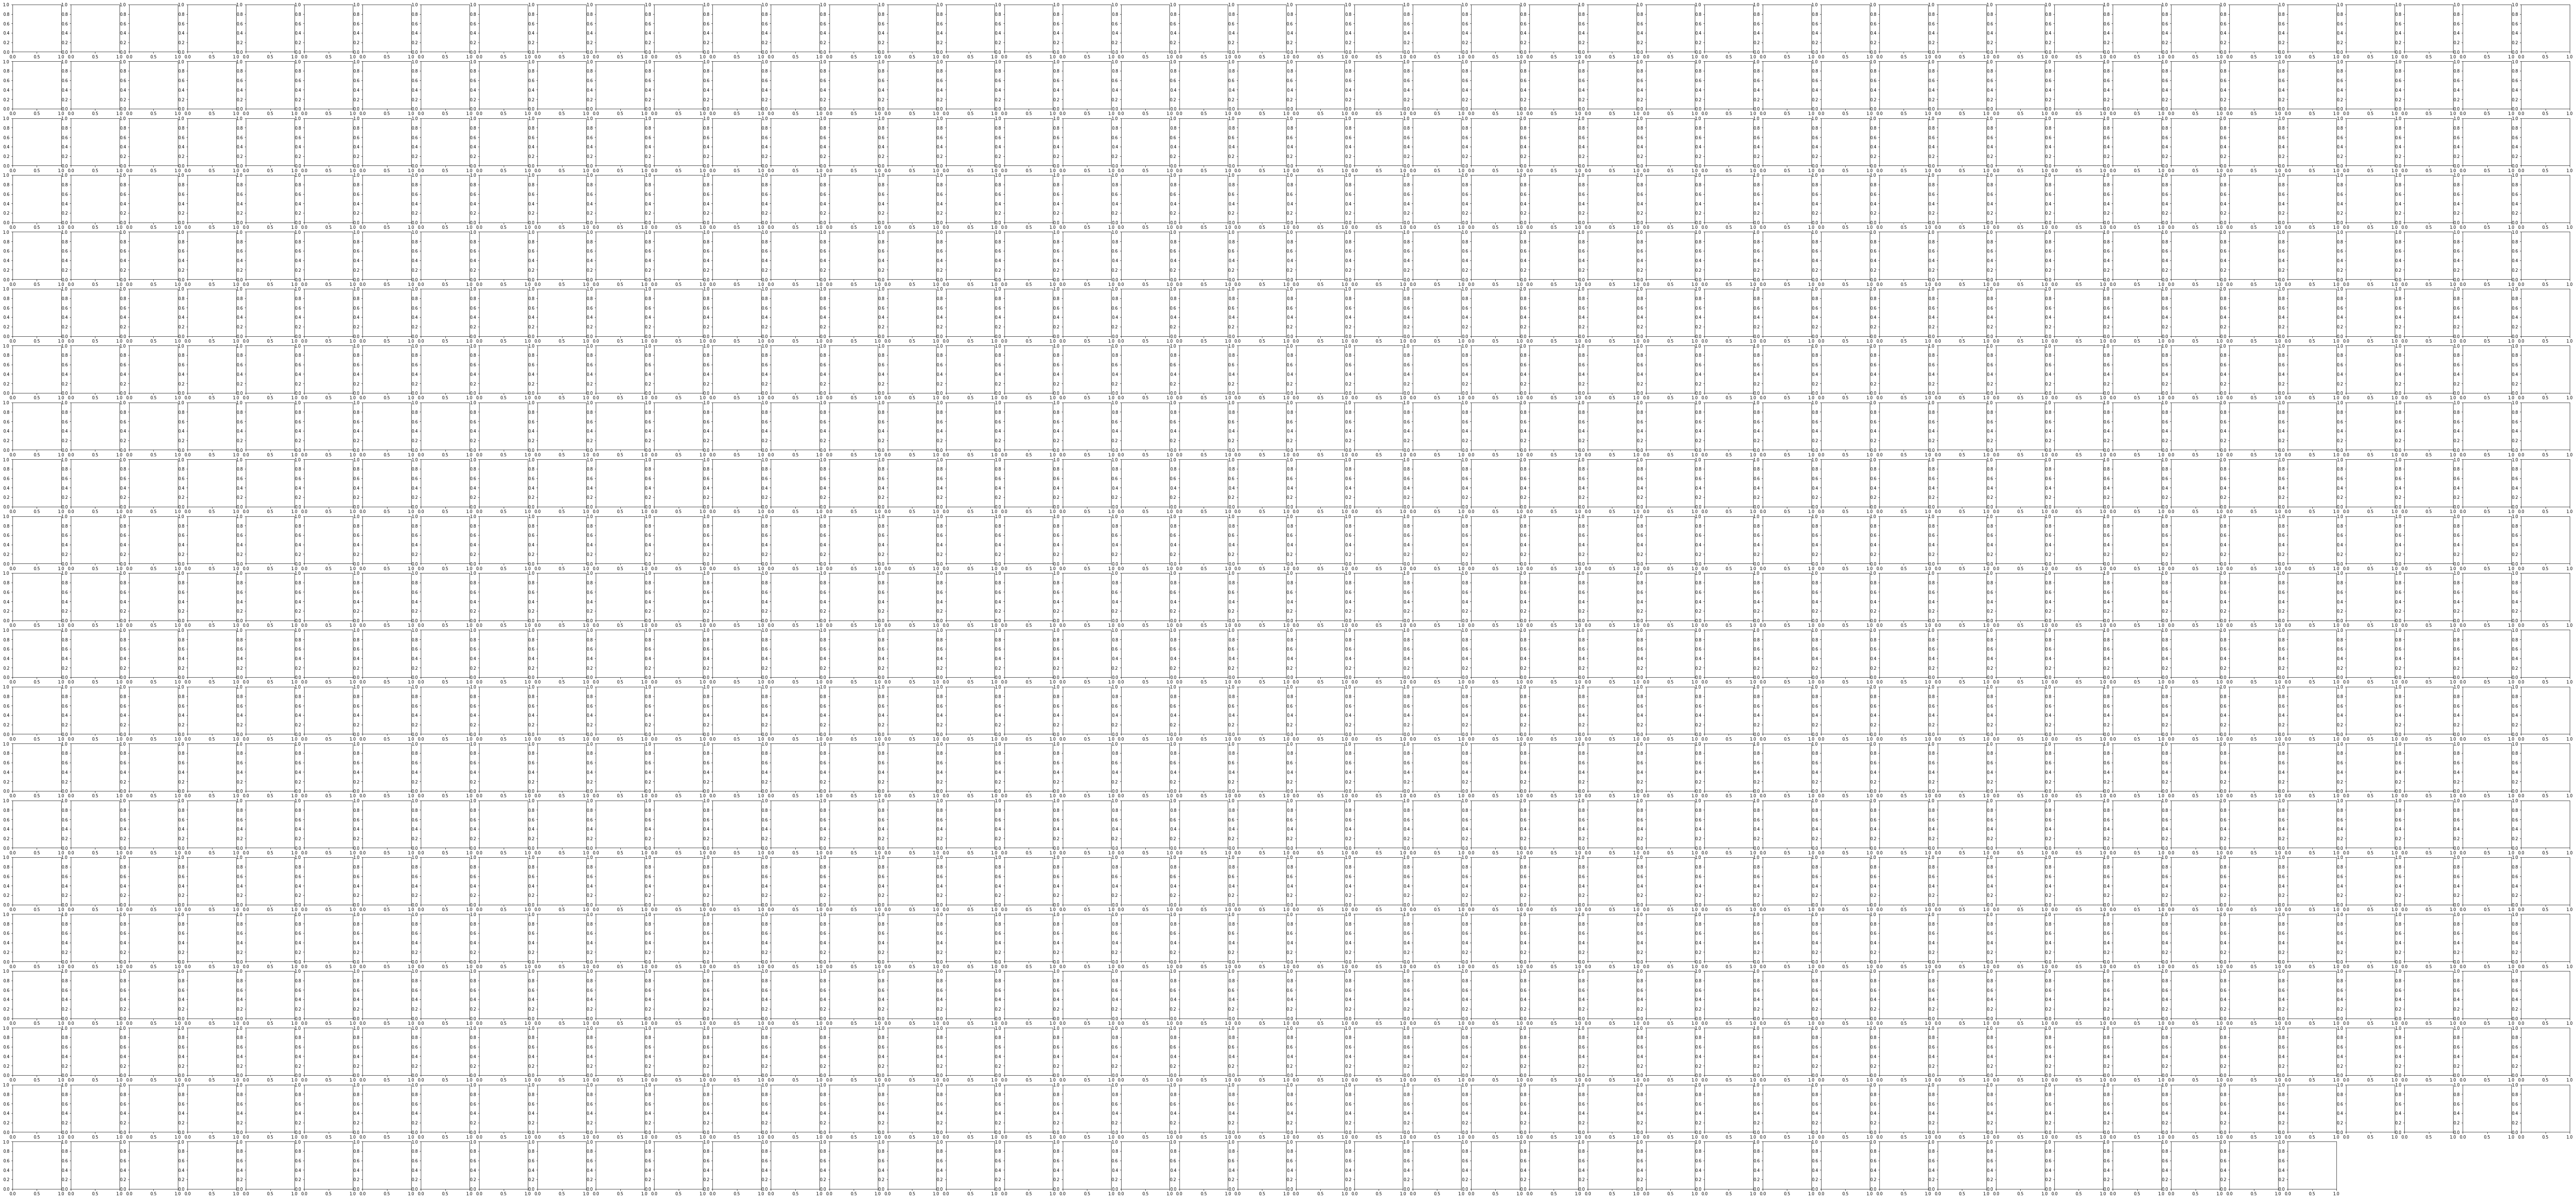

In [9]:
sb.pairplot(whole_data.dropna())

In [162]:
whole_data.head()

,GDI Rank,Country,Gender Development Index (GDI),Human Development Index (Female),Human Development Index (Male),Life Expectancy at Birth (Female),Life Expectancy at Birth (Male),Expected Years of Education (Female),Expected Years of Education (Male),Mean Years of Education (Female),...,Inequality-Adjusted Education Index,Inequality in Income,Inequality-Adjusted Income Index,Human Development Index (1990),Human Development Index (2000),Human Development Index (2010),Human Development Index (2011),Human Development Index (2012),Human Development Index (2013),Human Development Index (2014)
0,1.0,Norway,0.996,0.94,0.944,83.6,79.5,18.2,16.8,12.7,...,0.886,10.2,0.878,0.849,0.917,0.940,0.941,0.942,0.942,0.944
1,2.0,Australia,0.976,0.922,0.945,84.5,80.3,20.7,19.7,13.1,...,0.914,17.7,0.752,0.865,0.898,0.927,0.930,0.932,0.933,0.935
2,3.0,Switzerland,0.95,0.898,0.945,85,80.8,15.7,15.9,11.5,...,0.816,12.3,0.839,0.831,0.888,0.924,0.925,0.927,0.928,0.930
3,4.0,Denmark,0.977,0.912,0.934,82.2,78.3,19.3,18.1,12.8,...,0.897,14.4,0.787,0.799,0.862,0.908,0.920,0.921,0.923,0.923
4,5.0,Netherlands,0.947,0.893,0.943,83.3,79.7,18,17.9,11.6,...,0.858,11.6,0.817,0.829,0.877,0.909,0.919,0.920,0.920,0.922


In [ ]:
sb.pairplot(mpi_data.dropna())

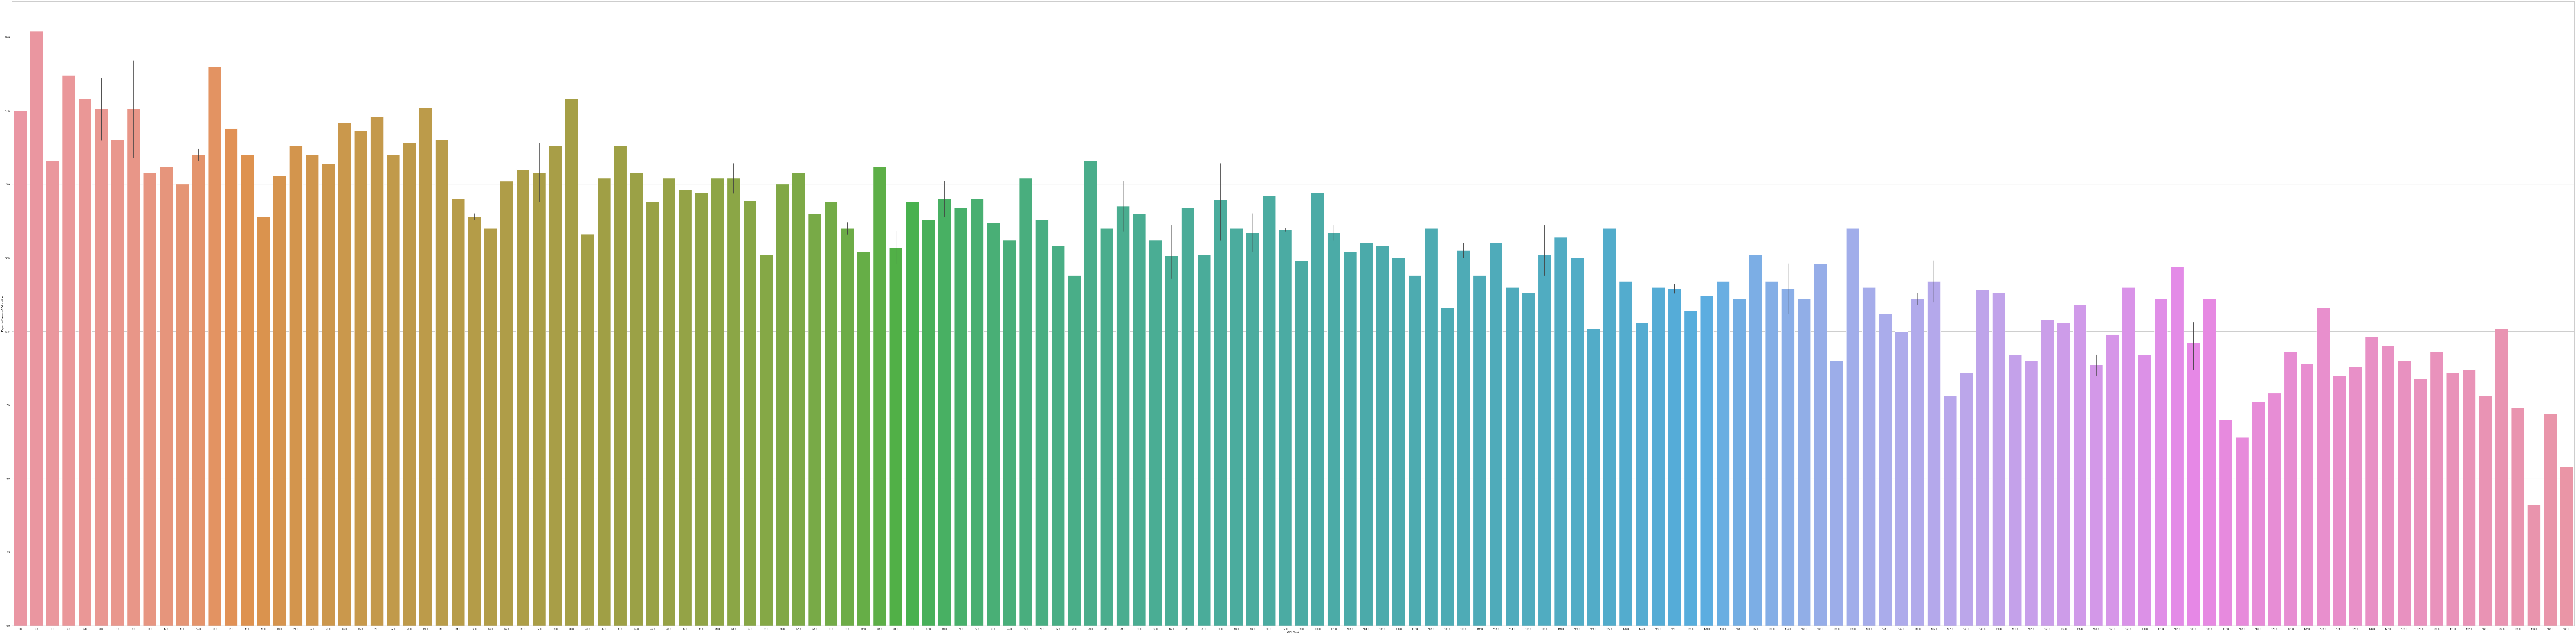

In [11]:
##Some Example Plots 
sb.set(style="whitegrid")
plt.figure(figsize=(200, 50))
sb.barplot(x=whole_data['GDI Rank'], y=whole_data['Expected Years of Education'])

In [72]:
mpi_data =mpi_data.drop("Year and Survey", axis =1)
mpi_data.describe()

,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards
count,101.000000,101.000000,99.000000,99.000000,101.000000,101.000000,101.000000,101.000000
mean,0.170149,32.599010,0.172949,32.497980,45.852475,25.306931,38.507921,36.189109
std,0.169847,29.718097,0.176056,29.931844,7.588631,11.511214,19.097983,14.060227
min,0.001000,0.400000,0.000000,0.000000,33.700000,1.500000,12.600000,2.600000
25%,0.015000,3.700000,0.015000,3.900000,39.100000,17.900000,25.700000,29.400000
50%,0.127000,26.900000,0.119000,27.200000,45.100000,26.400000,30.400000,40.000000
75%,0.290000,55.600000,0.309500,58.250000,50.800000,33.700000,47.100000,46.400000
max,0.584000,89.800000,0.605000,91.100000,65.000000,54.700000,95.900000,56.600000


In [134]:
sb.set(style="dark")

plt.figure(figsize=(400, 100))
sb.barplot(x=mpi_data['Multidimensional Poverty Index (MPI, HDRO)'], y=mpi_data['Intensity of Deprivation'])

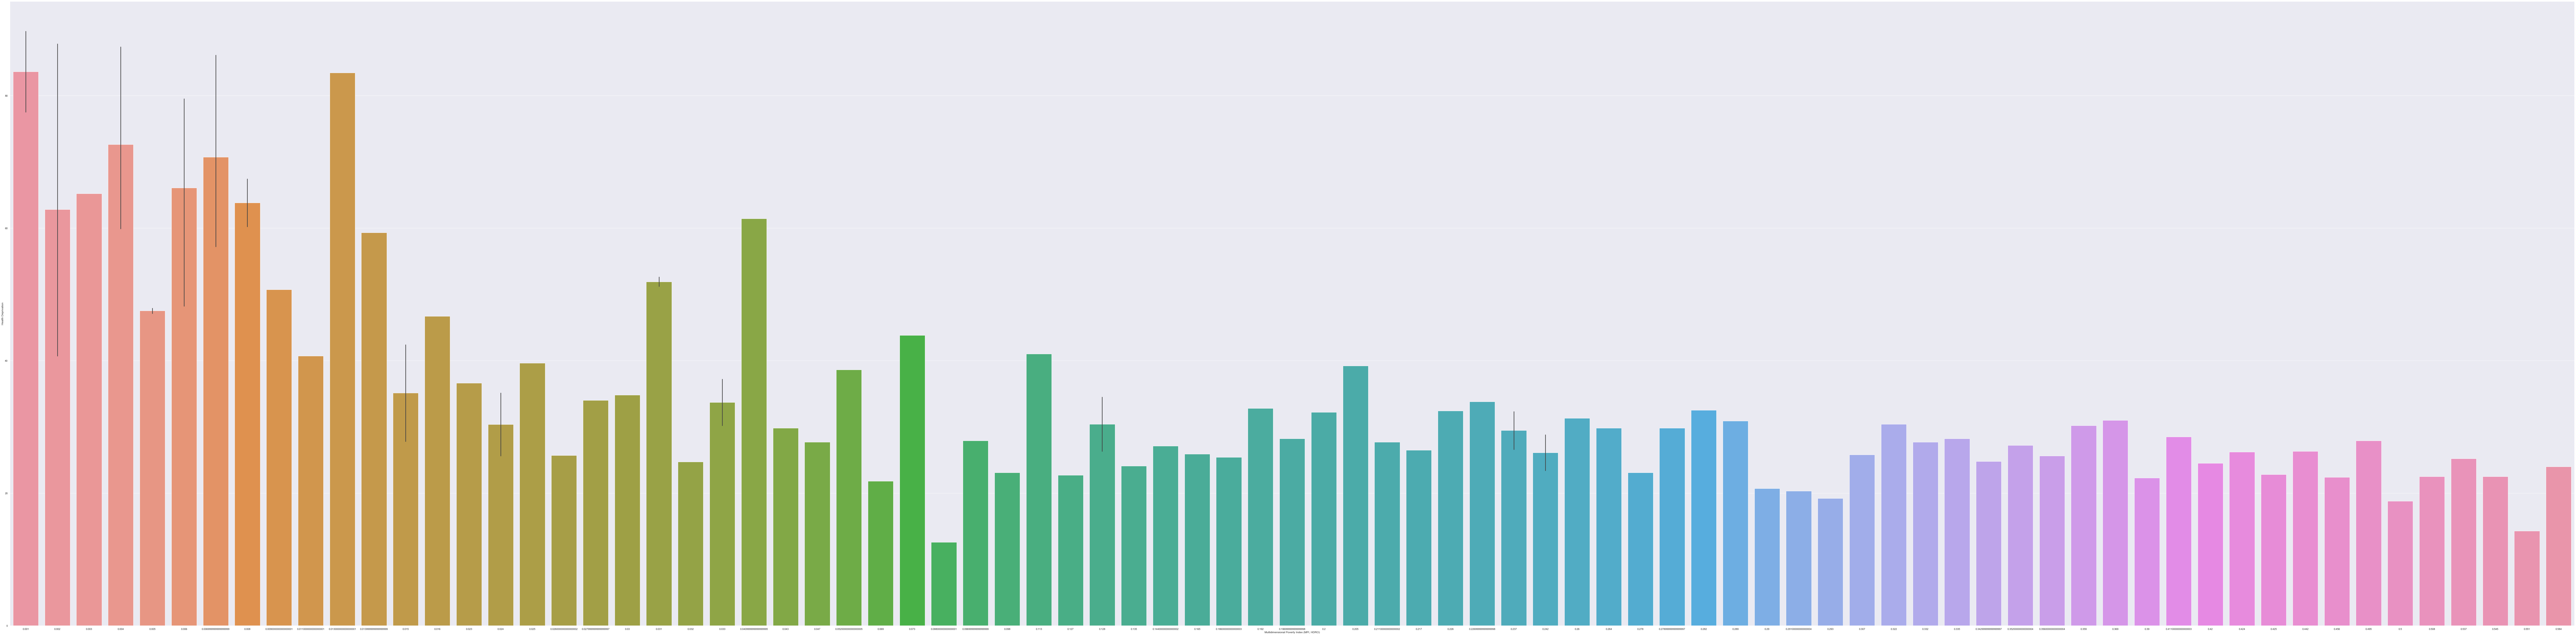

In [158]:
sb.set(style="darkgrid")
plt.figure(figsize=(200, 50))
sb.barplot(x=mpi_data['Multidimensional Poverty Index (MPI, HDRO)'], y=mpi_data['Health Deprivation'])

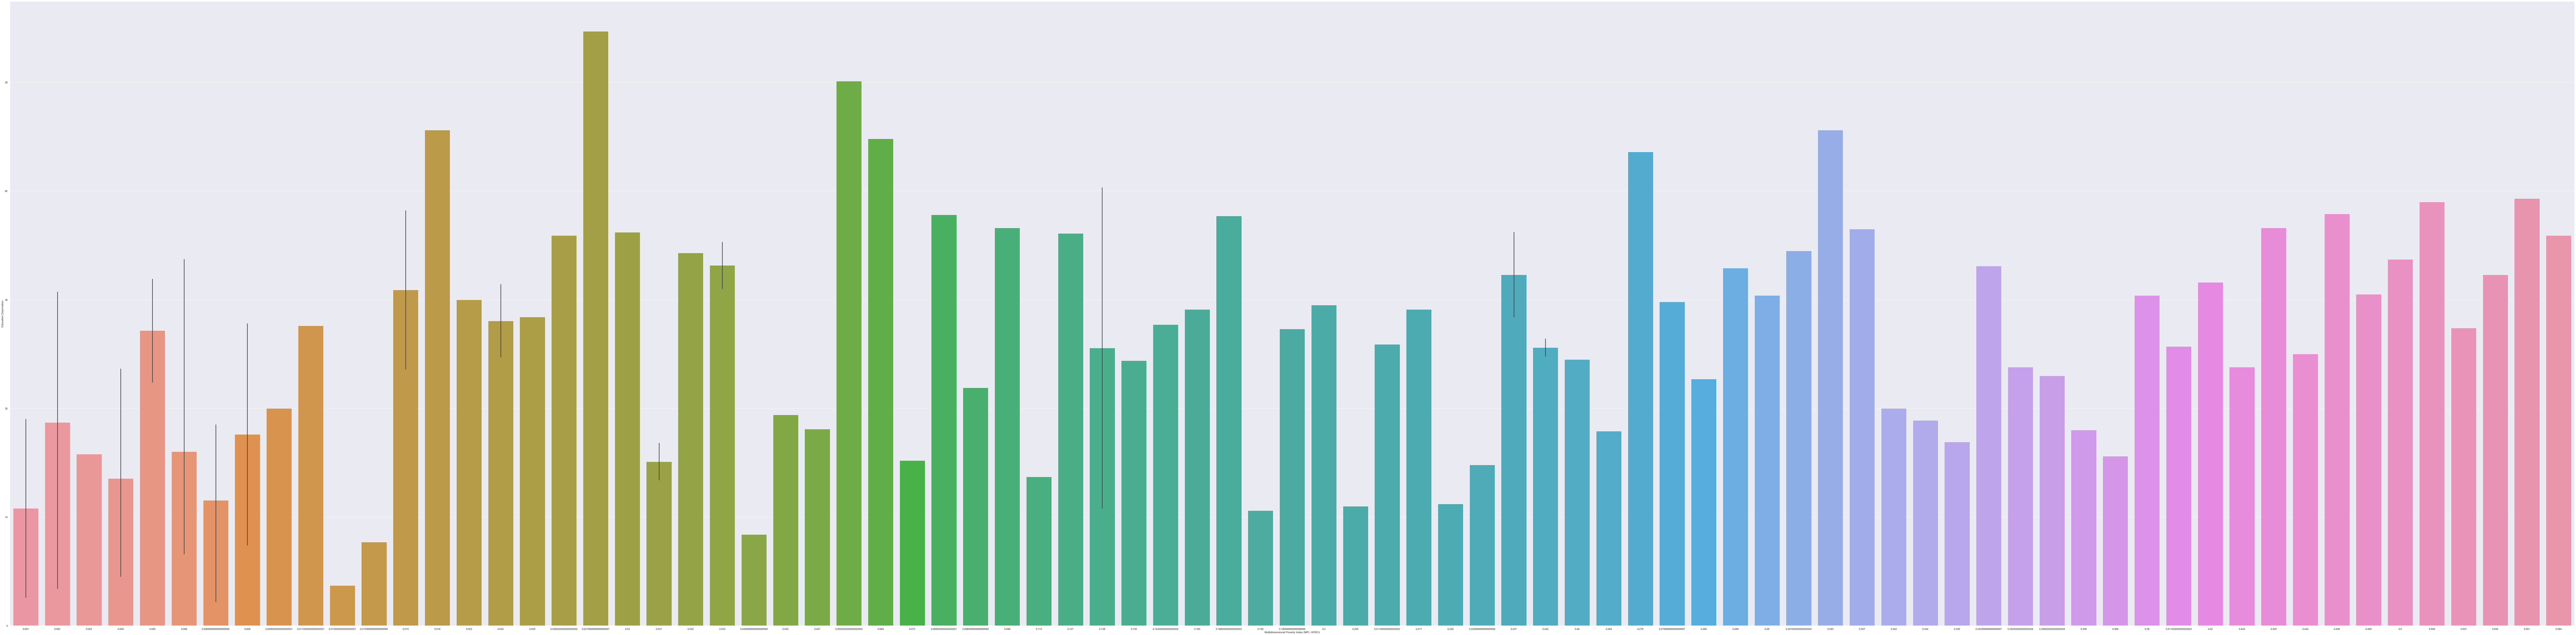

In [159]:
sb.set(style="darkgrid")
plt.figure(figsize=(200, 50))
sb.barplot(x=mpi_data['Multidimensional Poverty Index (MPI, HDRO)'], y=mpi_data['Education Deprivation'])

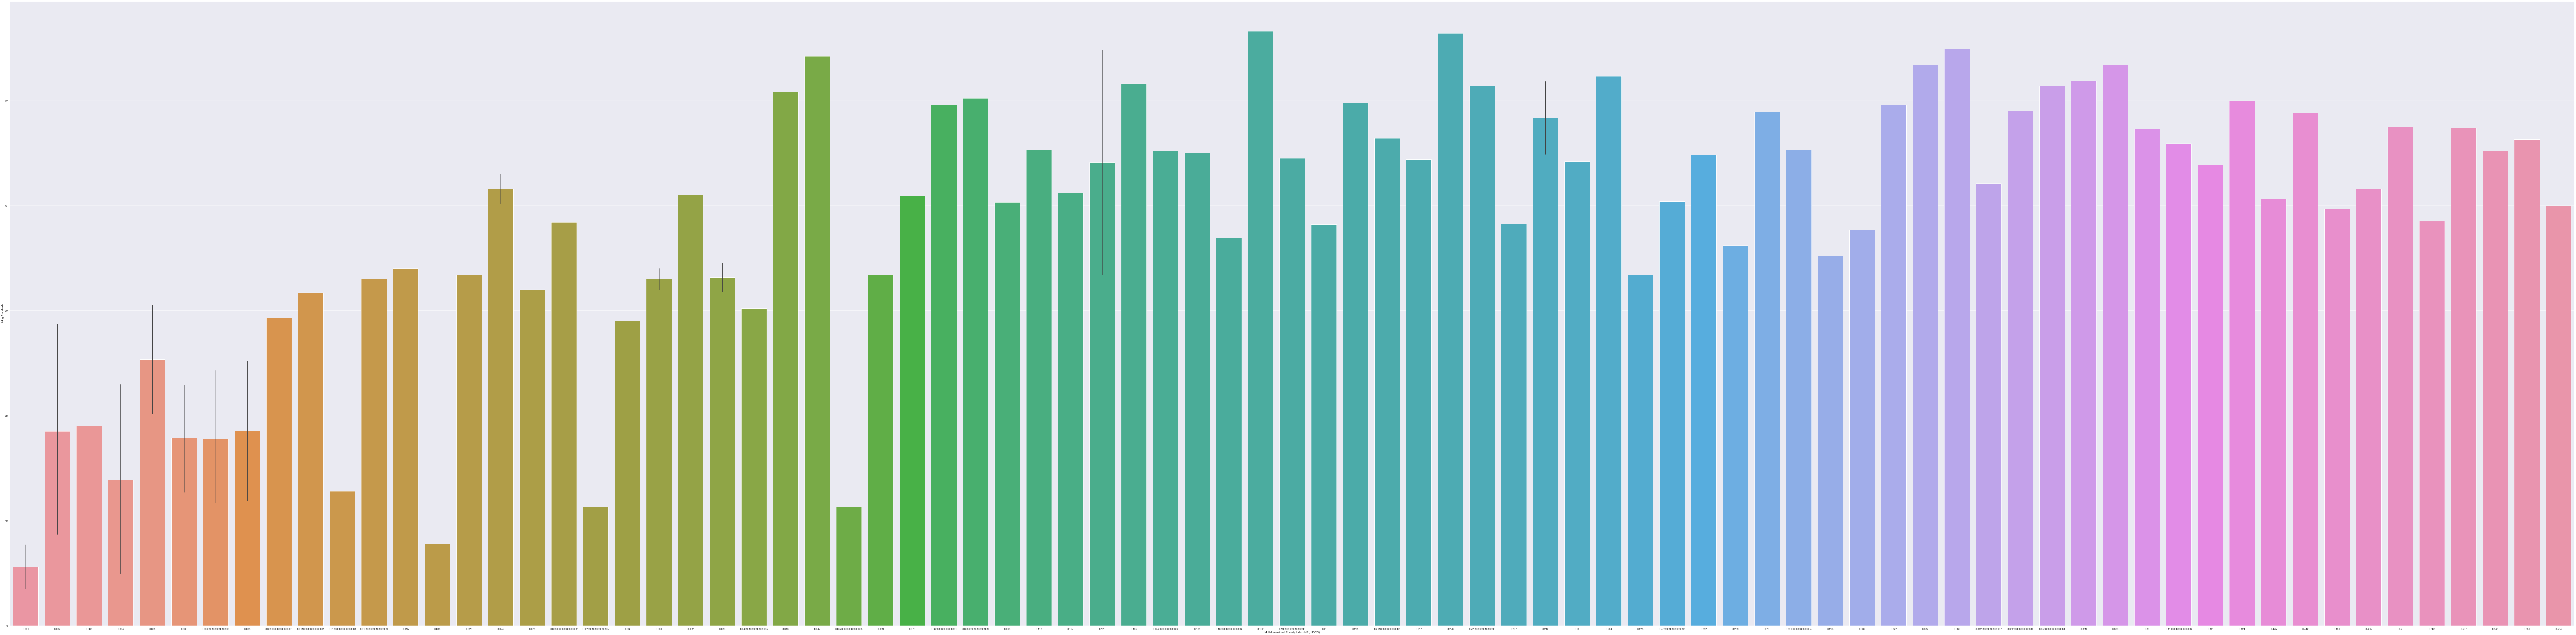

In [160]:
sb.set(style="darkgrid")
plt.figure(figsize=(200, 50))
sb.barplot(x=mpi_data['Multidimensional Poverty Index (MPI, HDRO)'], y=mpi_data['Living Standards'])

These rainbow plots are another way to exemplify how different variables are related to each other

# Regression Models for Filling Gaps
## Now we need to create regression models to fill in non-existant data points. To do this we must first drop points that have little to no data. 
- We use the loc feature to find all NaN  points. If there are >10 we will delete th erow to protect the integrity of the model. The following must be removed from the data set


- 'Hong Kong, China (SAR)'
- 'Liechtenstein'
- 'Brunei Darussalam' 
- 'Andorra' 
- 'Bahamas'
- 'Antigua and Barbuda'
- 'Palau'
- 'Seychelles' 
- 'Saint Kitts and Nevis'
- 'Grenada'
- 'Bosnia and Herzegovina'
- 'Dominica'
- 'Saint Vincent and the Grenadines'
- 'Turkmenistan'
- 'Gabon'
- 'Viet Nam'
- 'Cabo Verde'
- 'Micronesia (Federated States of)'
- 'Kiribati'
- 'Equatorial Guinea'
- 'Myanmar'
- 'Angola'
- 'Solomon Islands'
- 'Papua New Guinea'
- 'Haiti'
- 'Djibouti'
- 'Guinea-Bissau'
- 'Eritrea'

In [143]:
whole_data = whole_data.drop([whole_data.index[11], whole_data.index[12], whole_data.index[30], whole_data.index[33],
                 whole_data.index[54], whole_data.index[57] ,whole_data.index[59], whole_data.index[63], whole_data.index[76],
                 whole_data.index[78], whole_data.index[86], whole_data.index[93], whole_data.index[97],
                 whole_data.index[108], whole_data.index[109], whole_data.index[117], whole_data.index[121],
                 whole_data.index[122], whole_data.index[137], whole_data.index[136], whole_data.index[147],
                 whole_data.index[148], whole_data.index[156], whole_data.index[157], whole_data.index[162],
                 whole_data.index[167], whole_data.index[177], whole_data.index[185]], axis =0)

## whole_data
#### Now we need to find regression models (and test using bootstrapping and cross validation) for:
- Inequality in Education                                 
- Inequality-Adjusted Education Index                        
- Inequality in Income                                       
- Inequality-Adjusted Income Index 
- Inequality-adjusted HDI (IHDI)         
- IHDI Loss Percent                                         
- IHDI Rank Difference                                      
- Coefficient of Human Inequality                           
- Inequality in Life Expectancy  

##### We will create a vanilla regression, a  ridge regression, and lasso regression models for each to determine the missing values

In [15]:
def createTestTrain(data,labelX,labely):
    X = np.atleast_2d(np.array([float(h) for h in data.loc[:, labelX].dropna()])).transpose()
    y = np.array(data.loc[:,labely].dropna())
    n = X.shape[0]
    test = int(0.20*n)           
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]      
    y_test = y[:test]
    X_train = X[test:]     
    y_train = y[test:]
    return X_test, y_test, X_train, y_train, X, y

In [16]:
def crossVal(X,y):  
    n = X.shape[0]
    test = int(0.20*n)           
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    R2 = pd.DataFrame( np.array([ [0]*5, [0]*5, [0]*5, [0]*5]).transpose(), columns = ['train_1', 'test_1', 'train_2', 'test_2'])
    

    for k in range(5):
        X_test = X[k*test:(k+1)*test]      
        y_test = y[k*test:(k+1)*test]
        X_train = np.concatenate( (X[:k*test], X[(k+1)*test:]), axis=0)     
        y_train = np.concatenate( (y[:k*test], y[(k+1)*test:]), axis=0)
        reg = LinearRegression().fit(X_train, y_train)
        reg2 = LinearRegression().fit(X_train[:, 0:6], y_train)

        R2.loc[k, 'train_1'] = reg.score(X_train, y_train)
        R2.loc[k, 'test_1'] = reg.score(X_test, y_test)
        R2.loc[k, 'train_2'] = reg2.score(X_train[:, 0:6], y_train)
        R2.loc[k, 'test_2'] = reg2.score(X_test[:, 0:6], y_test)

    R2mean = [0]*4
    R2std = [0]*4
    for c in range(4):
        R2mean[c] = np.mean(R2.iloc[0:5, c])
        R2std[c] = np.std(R2.iloc[0:5, c])

    R2 = R2.append( pd.Series(R2mean, index=R2.columns), ignore_index=True )
    R2 = R2.append( pd.Series(R2std, index=R2.columns), ignore_index=True)
    R2.index = [0, 1, 2, 3, 4, 'Mean', 'Standard Deviation']
    return R2

In [17]:
def boots(X,y):
    num = 40 
    Xboot = [0]*num
    yboot = [0]*num

    n = X.shape[0]
    for k in range(num):
        sample = np.random.randint(0, n, n) 
        Xboot[k] = X[sample, :]
        yboot[k] = y[sample]
    test = int(0.20*n)
    R2 = pd.DataFrame( np.array([ [0]*num]*4).transpose(), columns = ['train_1', 'test_1', 'train_2', 'test_2'])

    for k in range(num):
        X_test = Xboot[k][:test]
        y_test = yboot[k][:test]
        X_train = Xboot[k][test:]
        y_train = yboot[k][test:]
        reg = LinearRegression().fit(X_train, y_train)
        reg2 = LinearRegression().fit(X_train[:, 0:6], y_train)

        R2.loc[k, 'train_1'] = reg.score(X_train, y_train)
        R2.loc[k, 'test_1'] = reg.score(X_test, y_test)
        R2.loc[k, 'train_2'] = reg2.score(X_train[:, 0:6], y_train)
        R2.loc[k, 'test_2'] = reg2.score(X_test[:, 0:6], y_test)

    R2mean = [0]*4
    R2std = [0]*4
    for c in range(4):
        R2mean[c] = np.mean(R2.iloc[0:5, c])
        R2std[c] = np.std(R2.iloc[0:5, c])

    R2 = R2.append( pd.Series(R2mean, index=R2.columns), ignore_index=True )
    R2 = R2.append( pd.Series(R2std, index=R2.columns), ignore_index=True)
    R2.index = list(range(num)) + ['Mean', 'Standard Deviation']
    return R2.tail(10)

### Inequality in Education:

In [62]:
X_test, y_test, X_train, y_train, X, y = createTestTrain(df,"Human Development Index (2014)","Inequality in Education")

IndexError: index 164 is out of bounds for axis 0 with size 152

In [35]:
reg = LinearRegression().fit(X_train, y_train)
b, m = reg.intercept_, *reg.coef_
print(b, m)

71.16314824902011 -74.4398739689738


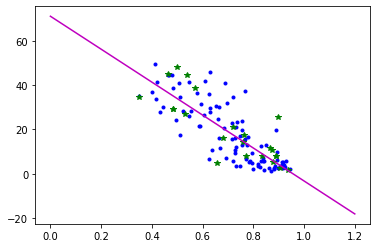

In [36]:
def plotfig():
    plt.plot(X_train, y_train, 'b.')
    plt.plot(X_test, y_test, 'g*')
    xx = np.linspace(0, 1.2, 20)
    yy = b + m*xx
    plt.plot(xx, yy, 'm-');
plotfig()

In [37]:
print('The training R2: {}'.format(reg.score(X_train, y_train)))
print('The testing R2: {}'.format(reg.score(X_test, y_test)))

The training R2: 0.6530308987341351
The testing R2: 0.6504890573766946


In [103]:
ineq = whole_data.columns[34]
for row in range(len(ineq)):
    print (whole_data.iloc[row,34])
    if pd.isna(whole_data.iloc[row,34]):
        print(whole_data.iloc[row,34])
        #print(x)
        #x = whole_data.iloc[row, len(whole_data.columns)]
        #y = mx+b
        #print(y)

2.3
1.9
5.7
3.0
4.1
2.4
5.4
5.3
3.9




3.5
2.8
2.4
25.5
9.9
6.0
19.8
8.1
8.0
3.5


In [239]:
crossVal(X,y) 

,train_1,test_1,train_2,test_2
0,0.656106,0.640164,0.656106,0.640164
1,0.600718,0.727770,0.600718,0.727770
2,0.648279,0.672017,0.648279,0.672017
3,0.710644,0.159159,0.710644,0.159159
4,0.650775,0.668727,0.650775,0.668727
Mean,0.653304,0.573567,0.653304,0.573567
Standard Deviation,0.034907,0.209139,0.034907,0.209139


In [240]:
boots(X,y)

,train_1,test_1,train_2,test_2
32,0.778224,0.540639,0.778224,0.540639
33,0.641252,0.506281,0.641252,0.506281
34,0.705198,0.727125,0.705198,0.727125
35,0.572182,0.720068,0.572182,0.720068
36,0.597826,0.328913,0.597826,0.328913
37,0.656400,0.636929,0.656400,0.636929
38,0.675011,0.650510,0.675011,0.650510
39,0.723110,0.789709,0.723110,0.789709
Mean,0.649483,0.650162,0.649483,0.650162
Standard Deviation,0.052847,0.079841,0.052847,0.079841


In [39]:
ridge_reg = Ridge(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(ridge_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(ridge_reg.score(X_test, y_test)))

Training R2: 0.6242308771617062
Testing R2: 0.4961213481979825


In [40]:
lasso_reg = Lasso(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(lasso_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(lasso_reg.score(X_test, y_test)))

Training R2: 0.48863620123884066
Testing R2: 0.4172512431159645


### Inequality-Adjusted Education Index:

In [241]:
X_test, y_test, X_train, y_train, X,y = createTestTrain(df,"Human Development Index (2014)","Inequality-Adjusted Education Index")

In [242]:
reg = LinearRegression().fit(X_train, y_train)
b, m = reg.intercept_, *reg.coef_
print(b, m)

-0.34118089954129427 1.2602125975628655


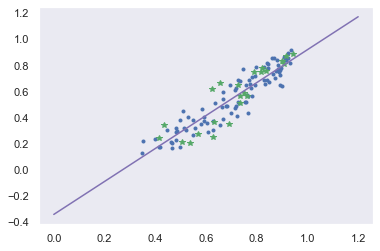

In [243]:
plotfig()

In [244]:
print('The training R2: {}'.format(reg.score(X_train, y_train)))
print('The testing R2: {}'.format(reg.score(X_test, y_test)))

The training R2: 0.8717901749988226
The testing R2: 0.7960385585901204


In [245]:
crossVal(X,y)

,train_1,test_1,train_2,test_2
0,0.853321,0.866294,0.853321,0.866294
1,0.857587,0.838221,0.857587,0.838221
2,0.846242,0.885798,0.846242,0.885798
3,0.864998,0.793718,0.864998,0.793718
4,0.860329,0.831909,0.860329,0.831909
Mean,0.856495,0.843188,0.856495,0.843188
Standard Deviation,0.006378,0.031460,0.006378,0.031460


In [246]:
boots(X,y)

,train_1,test_1,train_2,test_2
32,0.914559,0.845590,0.914559,0.845590
33,0.827410,0.876420,0.827410,0.876420
34,0.858986,0.855302,0.858986,0.855302
35,0.858508,0.907612,0.858508,0.907612
36,0.862454,0.928113,0.862454,0.928113
37,0.836311,0.860255,0.836311,0.860255
38,0.863384,0.853724,0.863384,0.853724
39,0.851357,0.858178,0.851357,0.858178
Mean,0.851264,0.818929,0.851264,0.818929
Standard Deviation,0.013400,0.045606,0.013400,0.045606


In [166]:
ridge_reg = Ridge(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(ridge_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(ridge_reg.score(X_test, y_test)))

Training R2: 0.7866355270170142
Testing R2: 0.7437106178241694


In [167]:
lasso_reg = Lasso(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(lasso_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(lasso_reg.score(X_test, y_test)))

Training R2: 0.0
Testing R2: -0.011737870656901572


### Inequality-Adjusted Income Index:

In [247]:
X_test, y_test, X_train, y_train, X,y = createTestTrain(df,"Human Development Index (2014)","Inequality-Adjusted Income Index")

In [248]:
reg = LinearRegression().fit(X_train, y_train)
b, m = reg.intercept_, *reg.coef_
print(b, m)

-0.19217299551401046 1.028983791188637


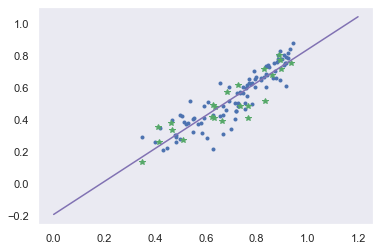

In [249]:
plotfig()

In [250]:
print('The training R2: {}'.format(reg.score(X_train, y_train)))
print('The testing R2: {}'.format(reg.score(X_test, y_test)))

The training R2: 0.8179522189558213
The testing R2: 0.8035831968028714


In [173]:
crossVal(X,y)

,train_1,test_1,train_2,test_2
0,0.824089,0.766943,0.824089,0.766943
1,0.799650,0.863841,0.799650,0.863841
2,0.842145,0.671802,0.842145,0.671802
3,0.802946,0.852727,0.802946,0.852727
4,0.818419,0.804729,0.818419,0.804729
Mean,0.817450,0.792008,0.817450,0.792008
Standard Deviation,0.015376,0.069407,0.015376,0.069407


In [253]:
boots(X,y)

,train_1,test_1,train_2,test_2
32,0.823844,0.697768,0.823844,0.697768
33,0.838013,0.795667,0.838013,0.795667
34,0.830431,0.832572,0.830431,0.832572
35,0.790423,0.891931,0.790423,0.891931
36,0.859475,0.859401,0.859475,0.859401
37,0.780646,0.817647,0.780646,0.817647
38,0.817656,0.794361,0.817656,0.794361
39,0.806645,0.749958,0.806645,0.749958
Mean,0.796878,0.768936,0.796878,0.768936
Standard Deviation,0.024373,0.077871,0.024373,0.077871


In [254]:
ridge_reg = Ridge(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(ridge_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(ridge_reg.score(X_test, y_test)))

Training R2: 0.7366985144751871
Testing R2: 0.7555319242851284


In [255]:
lasso_reg = Lasso(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(lasso_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(lasso_reg.score(X_test, y_test)))

Training R2: 0.0
Testing R2: -0.06473143935351566


### Inequality-adjusted HDI (IHDI):

In [256]:
X_test, y_test, X_train, y_train, X, y = createTestTrain(df,"Human Development Index (2014)","Inequality-adjusted HDI (IHDI)")

In [257]:
reg = LinearRegression().fit(X_train, y_train)
b, m = reg.intercept_, *reg.coef_
print(b, m)

-0.26200329992020666 1.1878990539567191


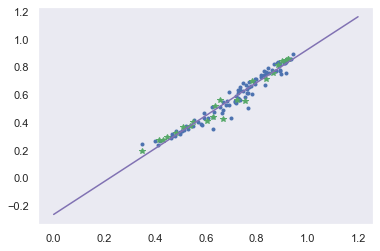

In [258]:
plotfig()

In [259]:
print('The training R2: {}'.format(reg.score(X_train, y_train)))
print('The testing R2: {}'.format(reg.score(X_test, y_test)))

The training R2: 0.9510879779899665
The testing R2: 0.9657842122877615


In [260]:
crossVal(X,y)

,train_1,test_1,train_2,test_2
0,0.955684,0.952891,0.955684,0.952891
1,0.955847,0.952450,0.955847,0.952450
2,0.951317,0.969675,0.951317,0.969675
3,0.962805,0.921501,0.962805,0.921501
4,0.952024,0.968658,0.952024,0.968658
Mean,0.955535,0.953035,0.955535,0.953035
Standard Deviation,0.004077,0.017411,0.004077,0.017411


In [261]:
boots(X,y)

,train_1,test_1,train_2,test_2
32,0.933755,0.973213,0.933755,0.973213
33,0.936873,0.951926,0.936873,0.951926
34,0.945855,0.959119,0.945855,0.959119
35,0.963488,0.955614,0.963488,0.955614
36,0.960261,0.975698,0.960261,0.975698
37,0.950855,0.982967,0.950855,0.982967
38,0.980436,0.980496,0.980436,0.980496
39,0.957492,0.980387,0.957492,0.980387
Mean,0.962244,0.964624,0.962244,0.964624
Standard Deviation,0.010814,0.017098,0.010814,0.017098


In [262]:
ridge_reg = Ridge(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(ridge_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(ridge_reg.score(X_test, y_test)))

Training R2: 0.851511599232624
Testing R2: 0.8698505329693687


In [263]:
lasso_reg = Lasso(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(lasso_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(lasso_reg.score(X_test, y_test)))

Training R2: 0.0
Testing R2: -0.05470938375350132


### IHDI Loss Percent:

In [264]:
X_test, y_test, X_train, y_train, X, y = createTestTrain(df,"Human Development Index (2014)","IHDI Loss Percent")

In [265]:
reg = LinearRegression().fit(X_train, y_train)
b, m = reg.intercept_, *reg.coef_
print(b, m)

61.7555094834981 -58.98865942583465


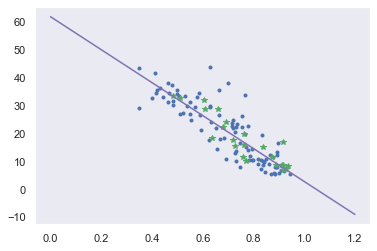

In [266]:
plotfig()

In [267]:
print('The training R2: {}'.format(reg.score(X_train, y_train)))
print('The testing R2: {}'.format(reg.score(X_test, y_test)))

The training R2: 0.744579902245229
The testing R2: 0.8112676053369151


In [268]:
crossVal(X,y)

,train_1,test_1,train_2,test_2
0,0.757413,0.739439,0.757413,0.739439
1,0.761720,0.727956,0.761720,0.727956
2,0.775817,0.631434,0.775817,0.631434
3,0.775378,0.663520,0.775378,0.663520
4,0.712939,0.900655,0.712939,0.900655
Mean,0.756653,0.732601,0.756653,0.732601
Standard Deviation,0.023044,0.093078,0.023044,0.093078


In [269]:
boots(X,y)

,train_1,test_1,train_2,test_2
32,0.838474,0.659418,0.838474,0.659418
33,0.731279,0.828281,0.731279,0.828281
34,0.756123,0.734137,0.756123,0.734137
35,0.715527,0.365475,0.715527,0.365475
36,0.773280,0.712805,0.773280,0.712805
37,0.858584,0.835938,0.858584,0.835938
38,0.721201,0.654518,0.721201,0.654518
39,0.754986,0.750524,0.754986,0.750524
Mean,0.778128,0.715284,0.778128,0.715284
Standard Deviation,0.020461,0.111734,0.020461,0.111734


In [270]:
ridge_reg = Ridge(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(ridge_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(ridge_reg.score(X_test, y_test)))

Training R2: 0.6794987068803768
Testing R2: 0.7481549847318387


In [271]:
lasso_reg = Lasso(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(lasso_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(lasso_reg.score(X_test, y_test)))

Training R2: 0.41146636107461787
Testing R2: 0.40351454360111805


### IHDI Rank Difference: 

In [272]:
X_test, y_test, X_train, y_train, X, y = createTestTrain(df,"Human Development Index (2014)","IHDI Rank Difference")

In [273]:
reg = LinearRegression().fit(X_train, y_train)
b, m = reg.intercept_, *reg.coef_
print(b, m)

4.940336834130669 -8.154258953589984


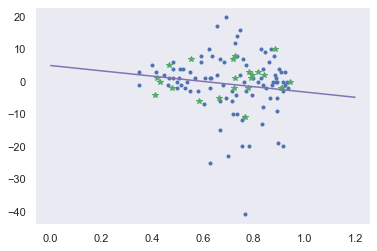

In [274]:
plotfig()

In [275]:
print('The training R2: {}'.format(reg.score(X_train, y_train)))
print('The testing R2: {}'.format(reg.score(X_test, y_test)))

The training R2: 0.018737554790060562
The testing R2: -0.2116841646607286


In [276]:
crossVal(X,y)

,train_1,test_1,train_2,test_2
0,0.011177,-0.031641,0.011177,-0.031641
1,0.005779,-0.068801,0.005779,-0.068801
2,0.009569,0.021694,0.009569,0.021694
3,0.011796,-0.033897,0.011796,-0.033897
4,0.023369,-0.144783,0.023369,-0.144783
Mean,0.012338,-0.051486,0.012338,-0.051486
Standard Deviation,0.005899,0.054887,0.005899,0.054887


In [277]:
boots(X,y)

,train_1,test_1,train_2,test_2
32,0.027189,-0.080966,0.027189,-0.080966
33,0.009480,0.035775,0.009480,0.035775
34,0.021094,-0.005124,0.021094,-0.005124
35,0.016557,-0.011988,0.016557,-0.011988
36,0.017219,-0.246510,0.017219,-0.246510
37,0.018587,0.002218,0.018587,0.002218
38,0.010376,0.017052,0.010376,0.017052
39,0.023450,0.018753,0.023450,0.018753
Mean,0.018285,-0.143007,0.018285,-0.143007
Standard Deviation,0.016280,0.141592,0.016280,0.141592


In [278]:
ridge_reg = Ridge(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(ridge_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(ridge_reg.score(X_test, y_test)))

Training R2: 0.01696796820081281
Testing R2: -0.15805839337849936


In [279]:
lasso_reg = Lasso(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(lasso_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(lasso_reg.score(X_test, y_test)))

Training R2: 0.0
Testing R2: -0.09191417483588804


### Coefficient of Human Inequality:

In [280]:
X_test, y_test, X_train, y_train,X, y = createTestTrain(df,"Human Development Index (2014)","Coefficient of Human Inequality")

In [281]:
reg = LinearRegression().fit(X_train, y_train)
b, m = reg.intercept_, *reg.coef_
print(b, m)

59.80574777030046 -56.90974467214435


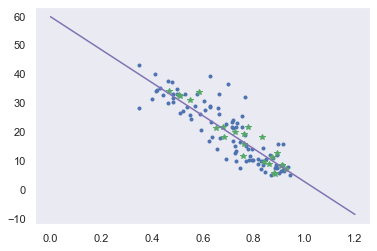

In [282]:
plotfig()

In [286]:
print('The training R2: {}'.format(reg.score(X_train, y_train)))
print('The testing R2: {}'.format(reg.score(X_test, y_test)))

The training R2: 0.7529447353374672
The testing R2: 0.8786086469915318


In [287]:
crossVal(X,y)

,train_1,test_1,train_2,test_2
0,0.784586,0.728856,0.784586,0.728856
1,0.767773,0.801458,0.767773,0.801458
2,0.800276,0.644409,0.800276,0.644409
3,0.764044,0.811201,0.764044,0.811201
4,0.757424,0.826574,0.757424,0.826574
Mean,0.774820,0.762500,0.774820,0.762500
Standard Deviation,0.015568,0.067930,0.015568,0.067930


In [288]:
boots(X,y)

,train_1,test_1,train_2,test_2
32,0.685363,0.779249,0.685363,0.779249
33,0.816989,0.786729,0.816989,0.786729
34,0.819888,0.847761,0.819888,0.847761
35,0.722401,0.837364,0.722401,0.837364
36,0.778043,0.791694,0.778043,0.791694
37,0.756206,0.831439,0.756206,0.831439
38,0.809942,0.823813,0.809942,0.823813
39,0.788281,0.805278,0.788281,0.805278
Mean,0.765800,0.733736,0.765800,0.733736
Standard Deviation,0.038342,0.090022,0.038342,0.090022


In [289]:
ridge_reg = Ridge(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(ridge_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(ridge_reg.score(X_test, y_test)))

Training R2: 0.6862795638120041
Testing R2: 0.7765725558602975


In [290]:
lasso_reg = Lasso(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(lasso_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(lasso_reg.score(X_test, y_test)))

Training R2: 0.3843430015535063
Testing R2: 0.4003715173847723


### Inequality in Life Expectancy: 

In [291]:
X_test, y_test, X_train, y_train, X, y = createTestTrain(df,"Human Development Index (2014)","Inequality in Life Expectancy")

In [292]:
reg = LinearRegression().fit(X_train, y_train)
b, m = reg.intercept_, *reg.coef_
print(b, m)

71.01149783478728 -76.95235592935781


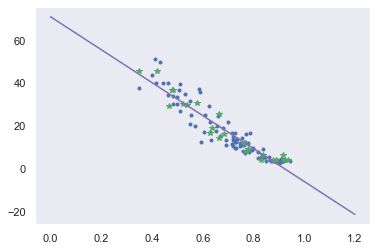

In [293]:
plotfig()

In [294]:
print('The training R2: {}'.format(reg.score(X_train, y_train)))
print('The testing R2: {}'.format(reg.score(X_test, y_test)))

The training R2: 0.8764528262779206
The testing R2: 0.9245361758883367


In [295]:
crossVal(X,y)

,train_1,test_1,train_2,test_2
0,0.879602,0.924263,0.879602,0.924263
1,0.889092,0.883393,0.889092,0.883393
2,0.894422,0.861762,0.894422,0.861762
3,0.897595,0.852764,0.897595,0.852764
4,0.885455,0.889829,0.885455,0.889829
Mean,0.889233,0.882402,0.889233,0.882402
Standard Deviation,0.006386,0.024952,0.006386,0.024952


In [296]:
boots(X,y)

,train_1,test_1,train_2,test_2
32,0.887973,0.852066,0.887973,0.852066
33,0.871212,0.918376,0.871212,0.918376
34,0.856268,0.909695,0.856268,0.909695
35,0.897672,0.828651,0.897672,0.828651
36,0.901785,0.941280,0.901785,0.941280
37,0.854416,0.909736,0.854416,0.909736
38,0.930804,0.857966,0.930804,0.857966
39,0.868414,0.874146,0.868414,0.874146
Mean,0.895653,0.852739,0.895653,0.852739
Standard Deviation,0.014180,0.055411,0.014180,0.055411


In [297]:
ridge_reg = Ridge(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(ridge_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(ridge_reg.score(X_test, y_test)))

Training R2: 0.7887686205220407
Testing R2: 0.8291790423644414


In [298]:
lasso_reg = Lasso(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(lasso_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(lasso_reg.score(X_test, y_test)))

Training R2: 0.5965550113875187
Testing R2: 0.6154661501263146


##### We do not want to include the model if it is >50% acurate so we will drop 
                                       
- IHDI Rank Difference

## mpi_data
#### We need to find regression models for:
- Population Below National Poverty Line
- Population Below $1.25 per Day




In [300]:
mdf = mpi_data.dropna()

### Population Below National Poverty Line

In [301]:
X_test, y_test, X_train, y_train, X, y = createTestTrain(mdf,"Multidimensional Poverty Index (MPI, HDRO)","Population Below National Poverty Line")

In [302]:
reg = LinearRegression().fit(X_train, y_train)
b, m = reg.intercept_, *reg.coef_
print(b, m)

23.393455778265604 68.77533948016223


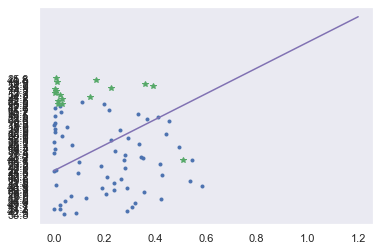

In [303]:
plotfig()

In [304]:
print('The training R2: {}'.format(reg.score(X_train, y_train)))
print('The testing R2: {}'.format(reg.score(X_test, y_test)))

The training R2: 0.38904625356949163
The testing R2: 0.18192525825978467


In [305]:
crossVal(X,y)

,train_1,test_1,train_2,test_2
0,0.355661,0.491299,0.355661,0.491299
1,0.401106,0.165279,0.401106,0.165279
2,0.358683,0.430126,0.358683,0.430126
3,0.278532,0.534494,0.278532,0.534494
4,0.489048,-0.105573,0.489048,-0.105573
Mean,0.376606,0.303125,0.376606,0.303125
Standard Deviation,0.068734,0.241291,0.068734,0.241291


In [306]:
boots(X,y)

,train_1,test_1,train_2,test_2
32,0.307994,0.557680,0.307994,0.557680
33,0.447635,0.380219,0.447635,0.380219
34,0.409076,0.044395,0.409076,0.044395
35,0.333911,0.090543,0.333911,0.090543
36,0.508394,0.295436,0.508394,0.295436
37,0.196896,0.499112,0.196896,0.499112
38,0.332609,0.298757,0.332609,0.298757
39,0.260588,0.056561,0.260588,0.056561
Mean,0.395269,0.332688,0.395269,0.332688
Standard Deviation,0.044114,0.227967,0.044114,0.227967


In [307]:
ridge_reg = Ridge(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(ridge_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(ridge_reg.score(X_test, y_test)))

Training R2: 0.33944071980101087
Testing R2: 0.19381429421813778


In [308]:
lasso_reg = Lasso(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(lasso_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(lasso_reg.score(X_test, y_test)))

Training R2: 0.28512377017562995
Testing R2: 0.14568571634798322


### Population Below 1.25 per Day:


In [309]:
X_test, y_test, X_train, y_train, X,y = createTestTrain(mdf,"Multidimensional Poverty Index (MPI, HDRO)","Population Below $1.25 per Day")

In [310]:
reg = LinearRegression().fit(X_train, y_train)
b, m = reg.intercept_, *reg.coef_
print(b, m)

3.8921462371341384 111.79184560124017


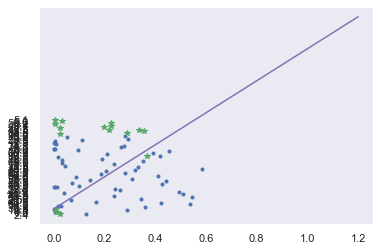

In [311]:
plotfig()

In [312]:
print('The training R2: {}'.format(reg.score(X_train, y_train)))
print('The testing R2: {}'.format(reg.score(X_test, y_test)))

The training R2: 0.6451528032386478
The testing R2: 0.6319035003254121


In [313]:
crossVal(X,y)

,train_1,test_1,train_2,test_2
0,0.673161,0.520519,0.673161,0.520519
1,0.601027,0.787152,0.601027,0.787152
2,0.655280,0.574956,0.655280,0.574956
3,0.656802,0.610632,0.656802,0.610632
4,0.659449,0.602538,0.659449,0.602538
Mean,0.649144,0.619159,0.649144,0.619159
Standard Deviation,0.024878,0.089727,0.024878,0.089727


In [314]:
boots(X,y)

,train_1,test_1,train_2,test_2
32,0.724180,0.564129,0.724180,0.564129
33,0.553306,0.634080,0.553306,0.634080
34,0.701177,0.541487,0.701177,0.541487
35,0.798238,0.743810,0.798238,0.743810
36,0.647733,0.620956,0.647733,0.620956
37,0.680361,0.452836,0.680361,0.452836
38,0.552844,0.657267,0.552844,0.657267
39,0.632048,0.590387,0.632048,0.590387
Mean,0.659868,0.606661,0.659868,0.606661
Standard Deviation,0.033175,0.117173,0.033175,0.117173


In [315]:
ridge_reg = Ridge(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(ridge_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(ridge_reg.score(X_test, y_test)))

Training R2: 0.5709840673910562
Testing R2: 0.48870234087556147


In [316]:
lasso_reg = Lasso(alpha=1).fit(X_train, y_train)
print('Training R2: {}'.format(lasso_reg.score(X_train, y_train)))
print('Testing R2: {}'.format(lasso_reg.score(X_test, y_test)))

Training R2: 0.5895061366226266
Testing R2: 0.5122332677942032


We decided against using PCA analysis on any of our models because it is not applicable (not enough variables and we already know where the strongest predictors are).

### Now that we have reformatted our data to make it workable, taken out the areas which don't have enough data, and made our models for filling in the gaps, we are ready to start building our main model for our problem:
We hope to be able to use our model to find the GDI (Gender Development Index) from the HDI (Human Development Index) within the MDI (Multidimensional Poverty Index) of any country with our dataset.

##### Inequality in Education:

In [31]:
ineq = whole_data.columns[34]
for row in range(len(ineq)):
    print (whole_data.iloc[row,34])
    if pd.isna(whole_data.iloc[row,34]):
        x = whole_data.iloc[row, len(whole_data.columns)]
        y = mx+b
        print(y)

2.3
1.9
5.7
3.0
4.1
2.4
5.4
5.3
3.9
nan
booty
nan
booty
3.5
2.8
2.4
25.5
9.9
6.0
19.8
8.1
8.0
3.5
2.1
2.6


In [33]:
whole_data.columns

Index(['GDI Rank', 'Country', 'Gender Development Index (GDI)',
       'Human Development Index (Female)', 'Human Development Index (Male)',
       'Life Expectancy at Birth (Female)', 'Life Expectancy at Birth (Male)',
       'Expected Years of Education (Female)',
       'Expected Years of Education (Male)',
       'Mean Years of Education (Female)', 'Mean Years of Education (Male)',
       'Estimated Gross National Income per Capita (Female)',
       'Estimated Gross National Income per Capita (Male)', 'GII Rank',
       'Gender Inequality Index (GII)', 'Maternal Mortality Ratio',
       'Adolescent Birth Rate', 'Percent Representation in Parliament',
       'Population with Secondary Education (Female)',
       'Population with Secondary Education (Male)',
       'Labour Force Participation Rate (Female)',
       'Labour Force Participation Rate (Male)', 'Life Expectancy at Birth',
       'Expected Years of Education', 'Mean Years of Education',
       'Gross National Income (GNI) 